In [3]:
import numpy as np
import pandas as pd
from skimage.io import imread
from time import time
import matplotlib.pyplot as plt
import glob
import os
import albumentations as A
import cv2

In [2]:
def get_image_pairs(directory: str):
    image_files = sorted(glob.glob(f'{directory}/*.jpg'))
    
    dataset = []
    for img_file in image_files:
        base_name = os.path.splitext(img_file)[0]  # Get the base name of the image file
        seg_file = f'{base_name}_seg.png'  # Construct the name of the segmentation file
        
        if os.path.exists(seg_file):  # Check if the segmentation file exists
            dataset.append((img_file, seg_file))
            
        # else:
        #     pairs.append((img_file, None))
    
    return dataset

Dataset/Train/ISIC_0001140.jpg
359


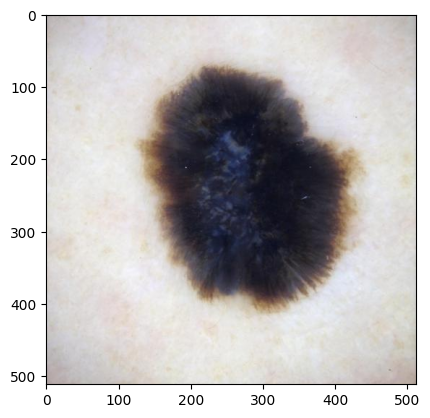

In [39]:
file = get_image_pairs('Dataset/Train')
count = {}
maxW = 0
maxH = 0
for i in range(len(file)):
    img = cv2.imread(file[i][0])
    count[imread(file[i][0]).shape] = count.get(img.shape, 0) + 1
    
    if img.shape[0] > maxW:
        maxW = imread(file[i][0]).shape[0]
        
    if img.shape[1] > maxH:
        maxH = img.shape[1]
    
    if img.shape[0] == 512:
        plt.imshow(img)
        print(file[i][0])
        print(i)

In [59]:
maxW, maxH

(512, 512)

In [58]:
for i in range (len(file)):
    img = cv2.imread(file[i][0])
    img_seg = cv2.imread(file[i][1])
    # f, ax = plt.subplots(1, 2, figsize=(3, 3))
    # ax[0].imshow(a)
    # ax[1].imshow(a_seg)
    
    MAXSIZE = 512
    padding1H = MAXSIZE - img.shape[0] 
    padding2H = padding1H // 2 if padding1H % 2 == 0 else padding1H // 2 + 1
    padding1H = padding1H // 2
    
    padding1W = MAXSIZE - imread(file[i][0]).shape[1]
    padding2W = padding1W // 2 if padding1W % 2 == 0 else padding1W // 2 + 1
    padding1W = padding1W // 2
    
    img = cv2.copyMakeBorder((img), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_REPLICATE)
    img_seg = cv2.copyMakeBorder((img_seg), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_REPLICATE)
    cv2.imwrite(f'Dataset/Train_seg/img{i}.jpg', img)
    cv2.imwrite(f'Dataset/Train_seg/img{i}_seg.jpg', img_seg)

### For the test set

In [60]:
file = get_image_pairs('Dataset/Test')
for i in range (len(file)):
    img = cv2.imread(file[i][0])
    img_seg = cv2.imread(file[i][1])
    # f, ax = plt.subplots(1, 2, figsize=(3, 3))
    # ax[0].imshow(a)
    # ax[1].imshow(a_seg)
    
    MAXSIZE = 512
    padding1H = MAXSIZE - img.shape[0] 
    padding2H = padding1H // 2 if padding1H % 2 == 0 else padding1H // 2 + 1
    padding1H = padding1H // 2
    
    padding1W = MAXSIZE - imread(file[i][0]).shape[1]
    padding2W = padding1W // 2 if padding1W % 2 == 0 else padding1W // 2 + 1
    padding1W = padding1W // 2
    
    img = cv2.copyMakeBorder((img), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_REPLICATE)
    img_seg = cv2.copyMakeBorder((img_seg), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_REPLICATE)
    cv2.imwrite(f'Dataset/Test_seg/img{i}.jpg', img)
    cv2.imwrite(f'Dataset/Test_seg/img{i}_seg.jpg', img_seg)

In [29]:
train = pd.read_csv("metadataTrain.csv")
train_X, train_y = train.drop(["CLASS"], axis=1), train['CLASS']
test_X = pd.read_csv("metadataTest.csv")

train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18998 entries, 0 to 18997
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        18998 non-null  object 
 1   SEX       18714 non-null  object 
 2   AGE       18674 non-null  float64
 3   POSITION  17028 non-null  object 
dtypes: float64(1), object(3)
memory usage: 593.8+ KB
